In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams.update({'figure.max_open_warning': 0})


In [115]:
df = pd.read_csv('data/male_players.csv')

In [116]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           16161 non-null  int64  
 1   Unnamed: 0             16161 non-null  int64  
 2   Rank                   16161 non-null  int64  
 3   Name                   16161 non-null  object 
 4   OVR                    16161 non-null  int64  
 5   PAC                    16161 non-null  int64  
 6   SHO                    16161 non-null  int64  
 7   PAS                    16161 non-null  int64  
 8   DRI                    16161 non-null  int64  
 9   DEF                    16161 non-null  int64  
 10  PHY                    16161 non-null  int64  
 11  Acceleration           16161 non-null  int64  
 12  Sprint Speed           16161 non-null  int64  
 13  Positioning            16161 non-null  int64  
 14  Finishing              16161 non-null  int64  
 15  Sh

In [118]:

df['Height'] = df['Height'].str.extract(r'(\d+)')  
df['Weight'] = df['Weight'].str.extract(r'(\d+)')  

df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

print(df[['Height', 'Weight']].head(10))



   Height  Weight
0     182      75
1     191      82
2     195      94
3     186      75
4     176      73
5     181      75
6     188      86
7     178      68
8     196      90
9     193      91


In [119]:

df = df.drop(columns=['url'], errors='ignore')
df = df.drop(
    columns=['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Alternative positions',
             'play style'])

In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0.1        16161 non-null  int64 
 1   Unnamed: 0          16161 non-null  int64 
 2   Rank                16161 non-null  int64 
 3   Name                16161 non-null  object
 4   OVR                 16161 non-null  int64 
 5   PAC                 16161 non-null  int64 
 6   SHO                 16161 non-null  int64 
 7   PAS                 16161 non-null  int64 
 8   DRI                 16161 non-null  int64 
 9   DEF                 16161 non-null  int64 
 10  PHY                 16161 non-null  int64 
 11  Acceleration        16161 non-null  int64 
 12  Sprint Speed        16161 non-null  int64 
 13  Positioning         16161 non-null  int64 
 14  Finishing           16161 non-null  int64 
 15  Shot Power          16161 non-null  int64 
 16  Long Shots          16

In [121]:
df.isna().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Rank                  0
Name                  0
OVR                   0
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF                   0
PHY                   0
Acceleration          0
Sprint Speed          0
Positioning           0
Finishing             0
Shot Power            0
Long Shots            0
Volleys               0
Penalties             0
Vision                0
Crossing              0
Free Kick Accuracy    0
Short Passing         0
Long Passing          0
Curve                 0
Dribbling             0
Agility               0
Balance               0
Reactions             0
Ball Control          0
Composure             0
Interceptions         0
Heading Accuracy      0
Def Awareness         0
Standing Tackle       0
Sliding Tackle        0
Jumping               0
Stamina               0
Strength              0
Aggression            0
Position              0
Weak foot       

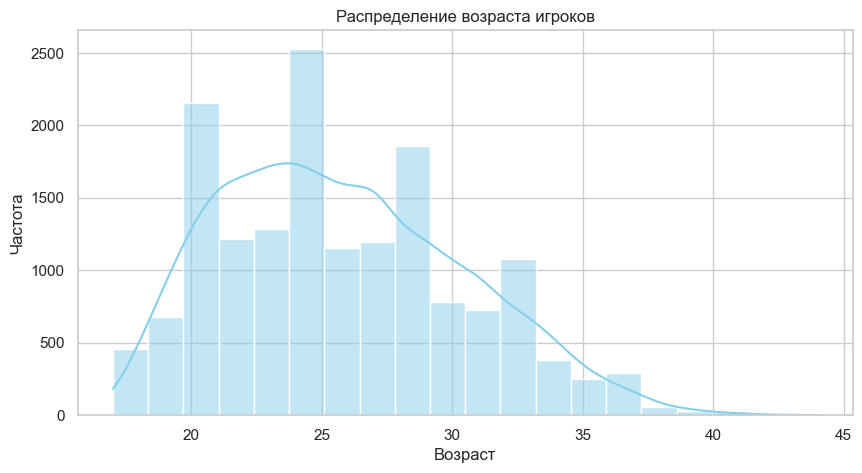

In [122]:
df['Age'] = np.ceil(df['Age'])  
median_age = df['Age'].median()
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=ax)
ax.set_title('Распределение возраста игроков')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.show()


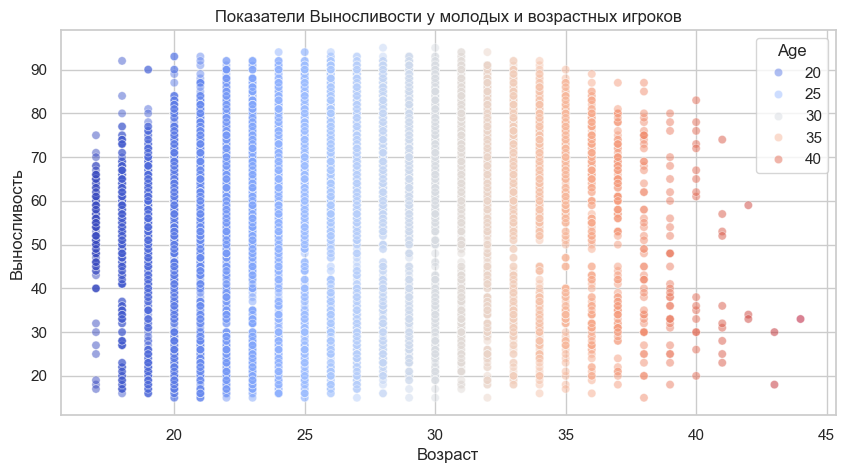

In [123]:

young_players = df[df['Age'] <= median_age]
older_players = df[df['Age'] > median_age]
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Age', y='Stamina', data=df, alpha=0.5, hue='Age', palette='coolwarm', ax=ax)
ax.set_title('Показатели Выносливости у молодых и возрастных игроков')
ax.set_xlabel('Возраст')
ax.set_ylabel('Выносливость')

plt.show()

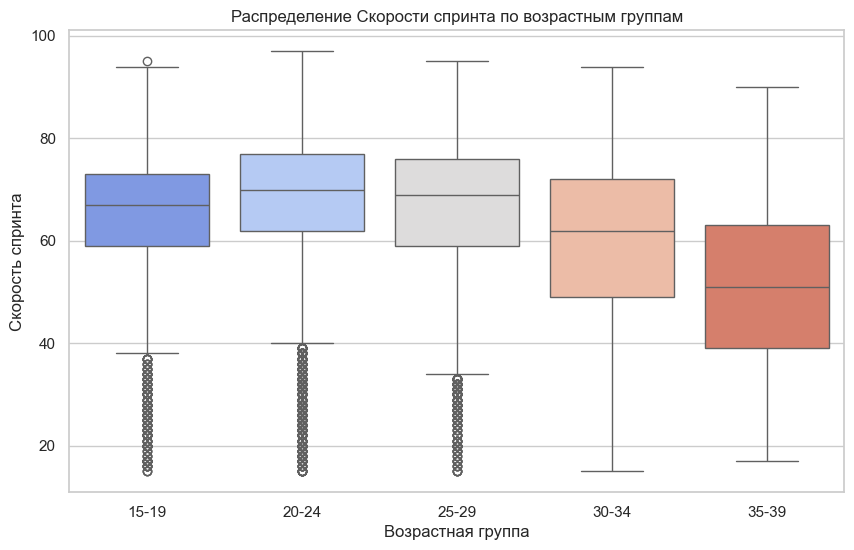

In [128]:

df['Age Group'] = pd.cut(df['Age'], bins=[15, 20, 25, 30, 35, 40], labels=['15-19', '20-24', '25-29', '30-34', '35-39'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Age Group', y='Acceleration', hue='Age Group', palette='coolwarm', ax=ax, dodge=False, legend=False)
ax.set_title('Распределение Скорости спринта по возрастным группам')
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Скорость спринта')
plt.show()

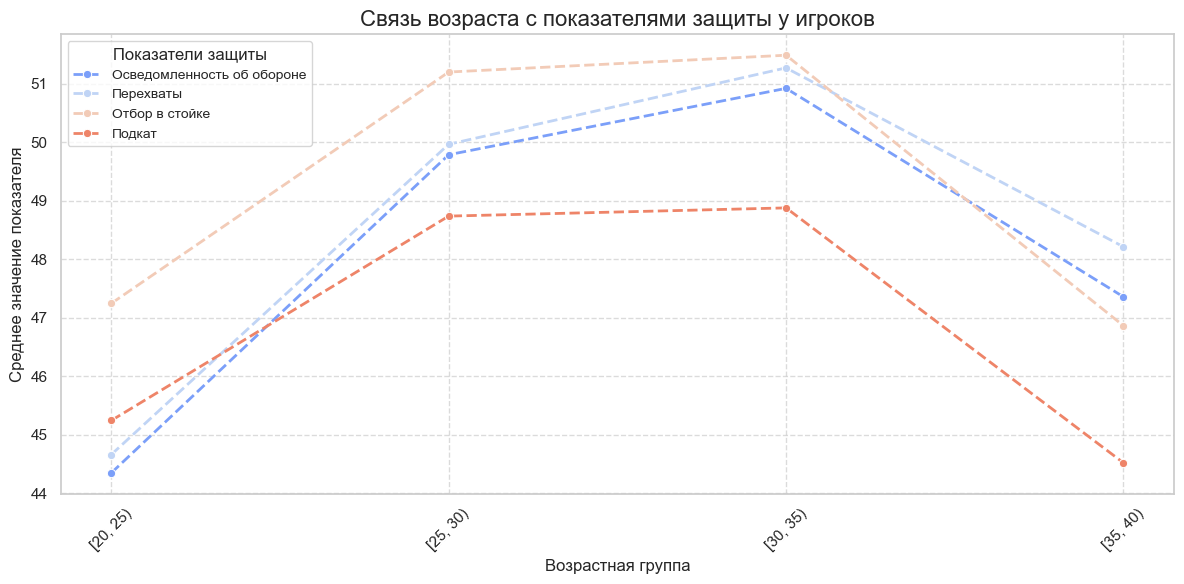

In [138]:

valid_age_mask = (df['Age'] >= 20) & (df['Age'] < 40)
df = df[valid_age_mask]
age_bins = pd.IntervalIndex.from_tuples([(20, 25), (25, 30), (30, 35), (35, 40)], closed='left')
df['Age Group'] = pd.cut(df['Age'], bins=age_bins).astype(str)
defense_metrics = ['Def Awareness', 'Interceptions', 'Standing Tackle', 'Sliding Tackle']
metric_translation = {
    'Def Awareness': 'Осведомленность об обороне',
    'Interceptions': 'Перехваты',
    'Standing Tackle': 'Отбор в стойке',
    'Sliding Tackle': 'Подкат'
}
for metric in defense_metrics:
    df[metric] = pd.to_numeric(df[metric], errors='coerce')
grouped_data = df.groupby('Age Group')[defense_metrics].mean().reset_index()
grouped_data['Age Group'] = pd.Categorical(
    grouped_data['Age Group'],
    categories=[str(interval) for interval in age_bins],
    ordered=True
)
grouped_data = grouped_data.sort_values('Age Group')
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("coolwarm", len(defense_metrics))
for idx, metric in enumerate(defense_metrics):
    sns.lineplot(
        data=grouped_data,
        x='Age Group',
        y=metric,
        label=metric_translation[metric], 
        marker='o',
        linestyle='--',
        color=palette[idx],
        linewidth=2,
        ax=ax
    )

ax.set_title("Связь возраста с показателями защиты у игроков", fontsize=16)
ax.set_xlabel("Возрастная группа", fontsize=12)
ax.set_ylabel("Среднее значение показателя", fontsize=12)
ax.legend(title="Показатели защиты", fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


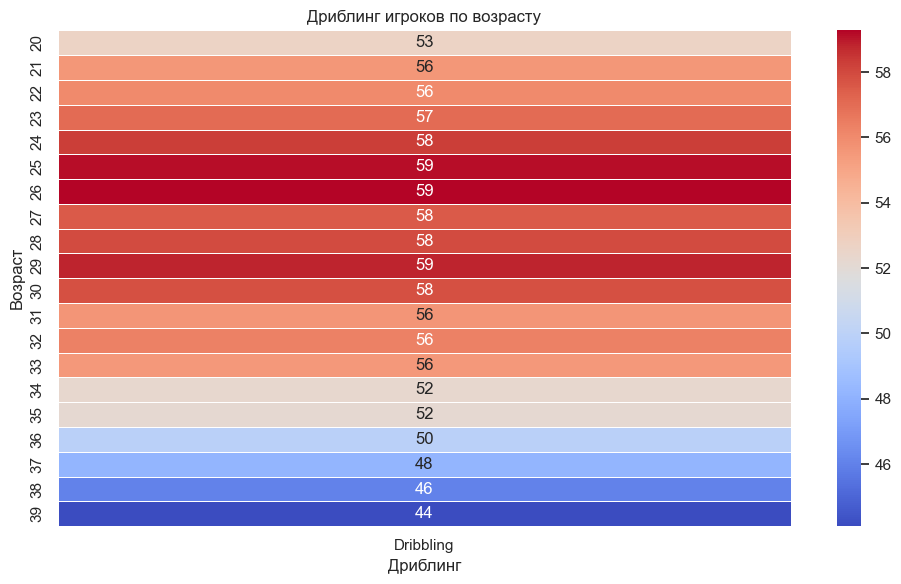

In [148]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.pivot_table(df, values='Dribbling', index=df['Age'].astype(int)), cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Дриблинг игроков по возрасту')
plt.xlabel('Дриблинг')
plt.ylabel('Возраст')
plt.tight_layout()
plt.show()